In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pymongo import MongoClient

In [2]:
client = MongoClient('127.0.0.1',
                     username="root",
                     password="rootpassword")

collection = client['performance'].get_collection("perf")

data = pd.DataFrame(list(collection.find()))
data.head()

,_id,submit_time,compute_platform,requested_cpu,requested_mem,requested_disk,input_file_size,input_file_compression,input_file_time,pipeline,start_time,output_file_size,output_file_compression,output_file_time,end_time,event
0,60edbdaf068d648d62afe2ee,07-13-2021 12:22:07.646559,aws,21,6,5,0,False,7440.0,pipeline_3,07-13-2021 14:26:07.646559,60.0,True,7320.0,07-13-2021 16:33:07.646559,0
1,60edbdaf068d648d62afe2ef,07-13-2021 12:22:07.774893,jgi,16,6,4,2,True,7020.0,pipeline_4,07-13-2021 14:20:07.774893,0.0,False,6540.0,07-13-2021 16:13:07.774893,1
2,60edbdaf068d648d62afe2f0,07-13-2021 12:22:07.776394,pnnl,26,5,4,1,True,6720.0,pipeline_3,07-13-2021 14:24:07.776394,60.0,False,7560.0,07-13-2021 16:08:07.776394,2
3,60edbdaf068d648d62afe2f1,07-13-2021 12:22:07.778042,pnnl,31,10,4,0,True,6960.0,pipeline_3,07-13-2021 14:22:07.778042,60.0,True,7140.0,07-13-2021 16:11:07.778042,3
4,60edbdaf068d648d62afe2f2,07-13-2021 12:22:07.780290,aws,26,6,3,2,False,7920.0,pipeline_2,07-13-2021 14:27:07.780290,60.0,False,7080.0,07-13-2021 16:20:07.780290,4


In [3]:
data.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      200 non-null    object 
 1   submit_time              200 non-null    object 
 2   compute_platform         200 non-null    object 
 3   requested_cpu            200 non-null    int64  
 4   requested_mem            200 non-null    int64  
 5   requested_disk           200 non-null    int64  
 6   input_file_size          200 non-null    int64  
 7   input_file_compression   200 non-null    bool   
 8   input_file_time          200 non-null    float64
 9   pipeline                 200 non-null    object 
 10  start_time               200 non-null    object 
 11  output_file_size         200 non-null    float64
 12  output_file_compression  200 non-null    bool   
 13  output_file_time         200 non-null    float64
 14  end_time                 2

In [4]:
parse_dates = ['submit_time', 'start_time', 'end_time']
for d in parse_dates:
    data[d] = pd.to_datetime(data[d])

convert_dtype = {'_id': "string",
                 'compute_platform': "string",
                 'requested_cpu': 'int8',
                 'requested_mem': 'int8',
                 'requested_disk': 'int8',
                 'input_file_size': 'int32',
                 'input_file_compression': 'bool',
                 'input_file_time': 'float32',
                 'pipeline': 'string',
                 'output_file_size': 'int32',
                 'output_file_compression': 'bool',
                 'output_file_time': 'float32'}
    
for d, t in convert_dtype.items():
    data[d] = data[d].astype(t)

In [5]:
dict(data.dtypes)

{'_id': StringDtype,
 'submit_time': dtype('<M8[ns]'),
 'compute_platform': StringDtype,
 'requested_cpu': dtype('int8'),
 'requested_mem': dtype('int8'),
 'requested_disk': dtype('int8'),
 'input_file_size': dtype('int32'),
 'input_file_compression': dtype('bool'),
 'input_file_time': dtype('float32'),
 'pipeline': StringDtype,
 'start_time': dtype('<M8[ns]'),
 'output_file_size': dtype('int32'),
 'output_file_compression': dtype('bool'),
 'output_file_time': dtype('float32'),
 'end_time': dtype('<M8[ns]'),
 'event': dtype('int64')}

In [6]:
data.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   _id                      200 non-null    string        
 1   submit_time              200 non-null    datetime64[ns]
 2   compute_platform         200 non-null    string        
 3   requested_cpu            200 non-null    int8          
 4   requested_mem            200 non-null    int8          
 5   requested_disk           200 non-null    int8          
 6   input_file_size          200 non-null    int32         
 7   input_file_compression   200 non-null    bool          
 8   input_file_time          200 non-null    float32       
 9   pipeline                 200 non-null    string        
 10  start_time               200 non-null    datetime64[ns]
 11  output_file_size         200 non-null    int32         
 12  output_file_compression  200 non-nul

In [7]:
data.head()

,_id,submit_time,compute_platform,requested_cpu,requested_mem,requested_disk,input_file_size,input_file_compression,input_file_time,pipeline,start_time,output_file_size,output_file_compression,output_file_time,end_time,event
0,60edbdaf068d648d62afe2ee,2021-07-13 12:22:07.646559,aws,21,6,5,0,False,7440.0,pipeline_3,2021-07-13 14:26:07.646559,60,True,7320.0,2021-07-13 16:33:07.646559,0
1,60edbdaf068d648d62afe2ef,2021-07-13 12:22:07.774893,jgi,16,6,4,2,True,7020.0,pipeline_4,2021-07-13 14:20:07.774893,0,False,6540.0,2021-07-13 16:13:07.774893,1
2,60edbdaf068d648d62afe2f0,2021-07-13 12:22:07.776394,pnnl,26,5,4,1,True,6720.0,pipeline_3,2021-07-13 14:24:07.776394,60,False,7560.0,2021-07-13 16:08:07.776394,2
3,60edbdaf068d648d62afe2f1,2021-07-13 12:22:07.778042,pnnl,31,10,4,0,True,6960.0,pipeline_3,2021-07-13 14:22:07.778042,60,True,7140.0,2021-07-13 16:11:07.778042,3
4,60edbdaf068d648d62afe2f2,2021-07-13 12:22:07.780290,aws,26,6,3,2,False,7920.0,pipeline_2,2021-07-13 14:27:07.780290,60,False,7080.0,2021-07-13 16:20:07.780290,4


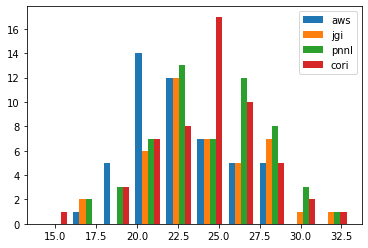

In [8]:
platform = data.compute_platform.unique()
plt.hist([data.loc[data.compute_platform == x, 'requested_cpu'] for x in platform], label=platform)
plt.legend()

In [9]:
data['full_runtime'] = data.end_time - data.submit_time
data['full_runtime'] = data['full_runtime'].apply(lambda x: x.value)

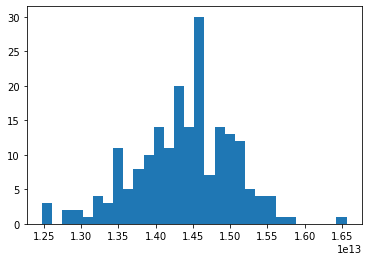

In [10]:
plt.hist(data.full_runtime, bins=30)
plt.show()

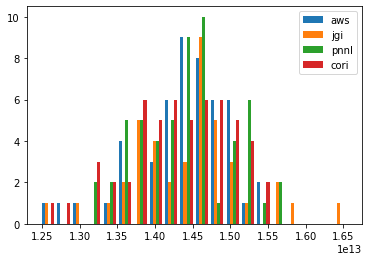

In [11]:
platform = data.compute_platform.unique()
plt.hist([data.loc[data.compute_platform == x, 'full_runtime'] for x in platform], label=platform, bins=20)
plt.legend()